In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling.exploratory import freq_tbl
import re

In [2]:
df=pd.read_csv("cuentas_credicel.csv",encoding="latin")

C:\Users\andre\AppData\Local\Temp\ipykernel_23196\1835407192.py:1: DtypeWarning: Columns (26,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("cuentas_credicel.csv",encoding="latin")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  float64
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  float64
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

In [4]:
print(df.isnull().sum())

folio                     0
tag                       0
folio_solicitud           0
fecha                     0
marca                     0
modelo                    0
plazo                     0
precio                    0
enganche                  0
descuento                 0
semana                    0
monto_financiado          0
costo_total               0
monto_accesorios          0
agente_venta              0
dis_venta                 0
status                    0
fraude                    0
empresa                  13
inversion                 0
pagos_realizados          0
reautorizacion            0
fecha_ultimo_pago      3356
fecha_pago_proximo     3356
status_cuenta          4197
puntos                 3595
riesgo                 2473
porc_enganche          2473
porc_tasa                 0
score_buro                0
razones_buro           4505
semana_actual          4505
codigo_postal           685
Unnamed: 33           21876
Unnamed: 34           22735
Unnamed: 35         

In [5]:
df["monto_accesorios"].fillna(0,inplace = True)


In [6]:
df["fecha_ultimo_pago"].fillna("DESCONOCIDO",inplace = True)


In [7]:
df["fecha_pago_proximo"].fillna("DESCONOCIDO",inplace = True)

In [8]:
x=df["empresa"].mode()
x
df["empresa"].fillna("microtec",inplace = True)

In [9]:
cols_to_exclude = ['Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36']
dfsel = df.drop(columns=cols_to_exclude)

In [10]:
print(dfsel.isnull().sum())

folio                    0
tag                      0
folio_solicitud          0
fecha                    0
marca                    0
modelo                   0
plazo                    0
precio                   0
enganche                 0
descuento                0
semana                   0
monto_financiado         0
costo_total              0
monto_accesorios         0
agente_venta             0
dis_venta                0
status                   0
fraude                   0
empresa                  0
inversion                0
pagos_realizados         0
reautorizacion           0
fecha_ultimo_pago        0
fecha_pago_proximo       0
status_cuenta         4197
puntos                3595
riesgo                2473
porc_enganche         2473
porc_tasa                0
score_buro               0
razones_buro          4505
semana_actual         4505
codigo_postal          685
dtype: int64


In [11]:
def update_status(row):
    if row['status'] == 1 and row['status_cuenta'] == 'Mora':
        return 3
    else:
        return row['status']

dfsel['status'] = dfsel.apply(update_status, axis=1)


In [12]:
def update_status_cuenta(row):
    if row['status'] == 1:
        return 'Corriente'
    elif row['status'] == 2:
        return 'Atrasado'
    elif row['status'] == 3:
        return 'Mora'
    elif row['status'] == 0:
        return 'Cancelado'
    else:
        return row['status_cuenta']

dfsel['status_cuenta'] = dfsel.apply(update_status_cuenta, axis=1)

In [13]:
dfsel["status_cuenta"].fillna("DESCONOCIDO",inplace = True)

In [14]:
dfsel['riesgo'] = dfsel['riesgo'].replace('Cancelado', 0)
dfsel['riesgo'] = dfsel['riesgo'].replace('Fraude', 0)
dfsel['riesgo'] = dfsel['riesgo'].replace('Atraso', 0)
dfsel['riesgo'] = pd.to_numeric(dfsel['riesgo'])


In [15]:
def categorize_riesgo(val):
    if pd.isna(val):
        return None
    if val == -100:
        return 'No hay riesgo'
    elif -99 <= val <= -52:
        return 'Riesgo minimo'
    elif -51 <= val <= -1:
        return 'Hay poco riesgo'
    elif val == 0:
        return 'Hay riesgo'
    elif 1 <= val <= 51:
        return 'Riesgo considerable'
    elif 52 <= val <= 99:
        return 'Riesgo Alto'
    elif val == 100:
        return 'Riesgo Enorme'

dfsel['riesgo_categorizado'] = dfsel['riesgo'].apply(categorize_riesgo)


In [16]:
dfsel["riesgo"].fillna("No Hay Datos",inplace = True)

In [17]:
dfsel["puntos"].fillna(0,inplace = True)

In [18]:
dfsel["porc_enganche"].fillna(0,inplace = True)

In [19]:
dfsel["razones_buro"].fillna(0,inplace = True)

In [20]:
dfsel["semana_actual"].fillna(0,inplace = True)

In [21]:
dfsel["codigo_postal"].fillna(0,inplace = True)

In [22]:
dfsel["riesgo_categorizado"].fillna("Hay riesgo",inplace = True)


In [23]:
print(dfsel.isnull().sum())

folio                  0
tag                    0
folio_solicitud        0
fecha                  0
marca                  0
modelo                 0
plazo                  0
precio                 0
enganche               0
descuento              0
semana                 0
monto_financiado       0
costo_total            0
monto_accesorios       0
agente_venta           0
dis_venta              0
status                 0
fraude                 0
empresa                0
inversion              0
pagos_realizados       0
reautorizacion         0
fecha_ultimo_pago      0
fecha_pago_proximo     0
status_cuenta          0
puntos                 0
riesgo                 0
porc_enganche          0
porc_tasa              0
score_buro             0
razones_buro           0
semana_actual          0
codigo_postal          0
riesgo_categorizado    0
dtype: int64


In [24]:
dfsel['plazo'] = dfsel['plazo'].str.extract('(\d+)').astype(int)

In [25]:
num_df = dfsel[['plazo', 'precio', 'enganche', 'descuento', 'semana', 'monto_financiado', 'costo_total', 'monto_accesorios', 'status', 'fraude', 'inversion', 'pagos_realizados', 'reautorizacion', 'puntos', 'porc_enganche', 'porc_tasa', 'score_buro']]


In [26]:
cat_df = dfsel.drop(columns=['plazo', 'precio', 'enganche', 'descuento', 'semana', 'monto_financiado', 'costo_total', 'monto_accesorios', 'status', 'fraude', 'inversion', 'pagos_realizados', 'reautorizacion', 'puntos', 'porc_enganche', 'porc_tasa', 'score_buro'])


<Axes: >

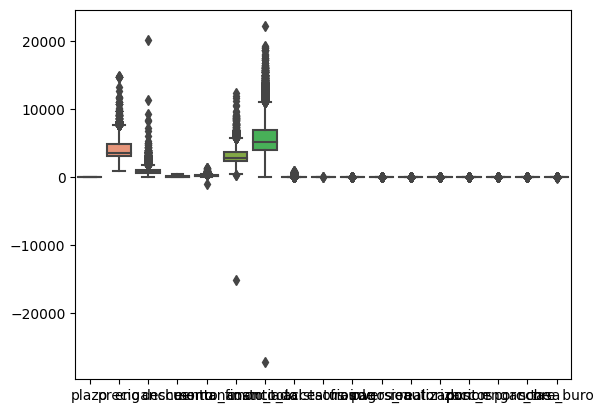

In [27]:
sns.boxplot(data=num_df)

In [28]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   folio                22735 non-null  int64 
 1   tag                  22735 non-null  object
 2   folio_solicitud      22735 non-null  int64 
 3   fecha                22735 non-null  object
 4   marca                22735 non-null  object
 5   modelo               22735 non-null  object
 6   agente_venta         22735 non-null  object
 7   dis_venta            22735 non-null  object
 8   empresa              22735 non-null  object
 9   fecha_ultimo_pago    22735 non-null  object
 10  fecha_pago_proximo   22735 non-null  object
 11  status_cuenta        22735 non-null  object
 12  riesgo               22735 non-null  object
 13  razones_buro         22735 non-null  object
 14  semana_actual        22735 non-null  object
 15  codigo_postal        22735 non-null  object
 16  ries

In [29]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   plazo             22735 non-null  int32  
 1   precio            22735 non-null  float64
 2   enganche          22735 non-null  float64
 3   descuento         22735 non-null  float64
 4   semana            22735 non-null  float64
 5   monto_financiado  22735 non-null  float64
 6   costo_total       22735 non-null  float64
 7   monto_accesorios  22735 non-null  float64
 8   status            22735 non-null  float64
 9   fraude            22735 non-null  float64
 10  inversion         22735 non-null  float64
 11  pagos_realizados  22735 non-null  float64
 12  reautorizacion    22735 non-null  float64
 13  puntos            22735 non-null  float64
 14  porc_enganche     22735 non-null  float64
 15  porc_tasa         22735 non-null  float64
 16  score_buro        22735 non-null  float6

In [30]:
y = num_df
percentile25 = y.quantile(0.25)
percentile75 = y.quantile(0.75)
iqr = percentile75 - percentile25
lower_bound = percentile25 - (1.5 * iqr)
upper_bound = percentile75 + (1.5 * iqr)
cleaned_data = num_df[(num_df >= lower_bound) & (num_df <= upper_bound)]

print(cleaned_data)

       plazo  precio  enganche  descuento  semana  monto_financiado  \
0         26  1949.0     780.0        0.0    81.0            1169.0   
1         13  2999.0    1050.0        0.0   225.0            1949.0   
2         13  1959.0     490.0        0.0   170.0            1469.0   
3         13  1959.0     490.0        0.0   170.0            1469.0   
4         39  4299.0    1075.0        0.0   178.0            3224.0   
...      ...     ...       ...        ...     ...               ...   
22730     26  3349.0     297.0        0.0   211.0            3052.0   
22731     26  4100.0    1209.0        0.0   200.0            2891.0   
22732     26  4849.0    1152.0        0.0   256.0            3697.0   
22733     39     NaN       NaN        0.0   386.0               NaN   
22734     26  5399.0    1086.0        0.0   299.0            4313.0   

       costo_total  monto_accesorios  status  fraude  inversion  \
0           2106.0               0.0     2.0     0.0        0.0   
1           2

<Axes: >

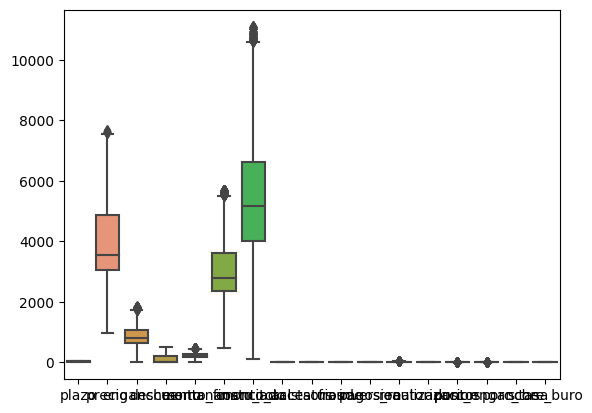

In [31]:
sns.boxplot(data=cleaned_data)

In [32]:
print(cleaned_data.isnull().sum())

28325


In [33]:
x=round(cleaned_data["precio"].mean(),1)
print(x)
cleaned_data["precio"].fillna(x,inplace = True)
y=round(cleaned_data["enganche"].mean(),1)
print(y)
cleaned_data["enganche"].fillna(y,inplace = True)
z=round(cleaned_data["semana"].mean(),1)
print(z)
cleaned_data["semana"].fillna(z,inplace = True)

3935.5
866.9
224.5


In [34]:
x=round(cleaned_data["monto_financiado"].mean(),1)
print(x)
cleaned_data["monto_financiado"].fillna(x,inplace = True)
y=round(cleaned_data["costo_total"].mean(),1)
print(y)
cleaned_data["costo_total"].fillna(y,inplace = True)
z=round(cleaned_data["monto_accesorios"].mean(),1)
print(z)
cleaned_data["monto_accesorios"].fillna(z,inplace = True)

3001.8
5448.5
0.0


In [35]:
x=round(cleaned_data["status"].mean(),1)
print(x)
cleaned_data["status"].fillna(x,inplace = True)
y=round(cleaned_data["fraude"].mean(),1)
print(y)
cleaned_data["fraude"].fillna(y,inplace = True)
z=round(cleaned_data["inversion"].mean(),1)
print(z)
cleaned_data["inversion"].fillna(z,inplace = True)

1.7
0.0
0.0


In [36]:
x=round(cleaned_data["pagos_realizados"].mean(),1)
print(x)
cleaned_data["pagos_realizados"].fillna(x,inplace = True)
y=round(cleaned_data["reautorizacion"].mean(),1)
print(y)
cleaned_data["reautorizacion"].fillna(y,inplace = True)
z=round(cleaned_data["puntos"].mean(),1)
print(z)
cleaned_data["puntos"].fillna(z,inplace = True)

9.5
0.0
11.7


In [37]:
x=round(cleaned_data["porc_enganche"].mean(),1)
print(x)
cleaned_data["porc_enganche"].fillna(x,inplace = True)
y=round(cleaned_data["porc_tasa"].mean(),1)
print(y)
cleaned_data["porc_tasa"].fillna(y,inplace = True)
z=round(cleaned_data["score_buro"].mean(),1)
print(z)
cleaned_data["score_buro"].fillna(z,inplace = True)

-0.5
0.0
0.0


In [38]:
print(cleaned_data.isnull().sum())

plazo               0
precio              0
enganche            0
descuento           0
semana              0
monto_financiado    0
costo_total         0
monto_accesorios    0
status              0
fraude              0
inversion           0
pagos_realizados    0
reautorizacion      0
puntos              0
porc_enganche       0
porc_tasa           0
score_buro          0
dtype: int64


In [39]:
Df_colo = pd.concat([cleaned_data, cat_df], axis=1)

In [40]:
Df_colo.to_csv("Credicel_Limpio1.csv")